# Breast Cancer Prediction
We would like to predict whether the breast tumor is benign or malignant based on the tumor dimension, such as mean radius, mean texture and worst radius.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Exploratory Data Analysis

Text(0.5, 1.0, 'Count of Benign and Malignant Tumor')

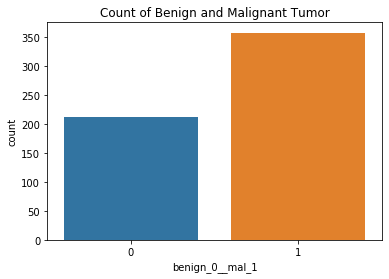

In [42]:
sns.countplot(x='benign_0__mal_1', data=df)
plt.title('Count of Benign and Malignant Tumor')

Text(0.5, 1.0, 'Correlation of Benign and Malignant Tumor and Another Variables')

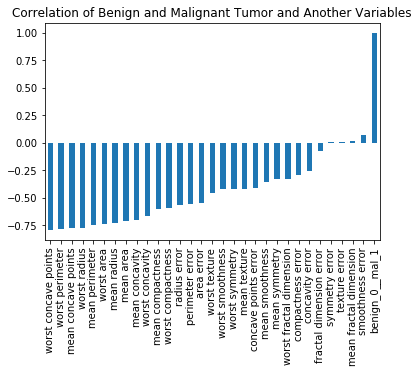

In [44]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.title('Correlation of Benign and Malignant Tumor and Another Variables')

Text(0.5, 1, 'Correlation Heatmap of Variables')

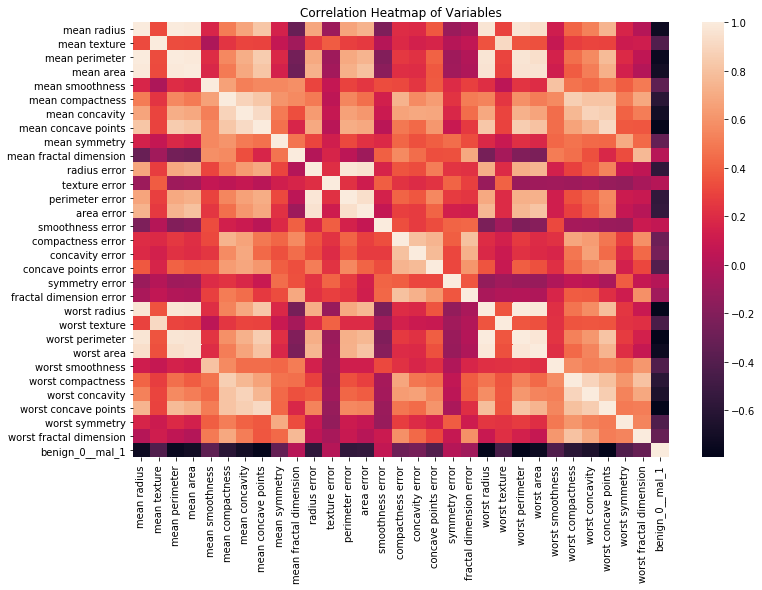

In [45]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr())
plt.title('Correlation Heatmap of Variables')

# Scaling and Train Test Split

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

Because of small dataset, we divided the train and test dataset into ratio 75:25.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

To prevent data leakage, we don't fit our test data.

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(426, 30)

In [18]:
X_test.shape

(143, 30)

# Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Let's start the model with two layers with 30 and 15 neurons:

In [20]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

For epochs, we set a rather big value to know where the loss is begin to decrease. We set the validation data 33% of the training data.

In [22]:
model.fit(X_train, y_train, epochs=600, validation_split=0.33)

/600
285/285 [==============================] - 0s 222us/sample - loss: 0.0089 - val_loss: 0.2588
Epoch 415/600
285/285 [==============================] - 0s 186us/sample - loss: 0.0103 - val_loss: 0.2459
Epoch 416/600
285/285 [==============================] - 0s 185us/sample - loss: 0.0117 - val_loss: 0.2425
Epoch 417/600
285/285 [==============================] - 0s 200us/sample - loss: 0.0090 - val_loss: 0.2556
Epoch 418/600
285/285 [==============================] - 0s 183us/sample - loss: 0.0086 - val_loss: 0.2345
Epoch 419/600
285/285 [==============================] - 0s 189us/sample - loss: 0.0097 - val_loss: 0.2528
Epoch 420/600
285/285 [==============================] - 0s 185us/sample - loss: 0.0121 - val_loss: 0.2477
Epoch 421/600
285/285 [==============================] - 0s 194us/sample - loss: 0.0153 - val_loss: 0.2311
Epoch 422/600
285/285 [==============================] - 0s 198us/sample - loss: 0.0097 - val_loss: 0.2648
Epoch 423/600
285/285 [=======================

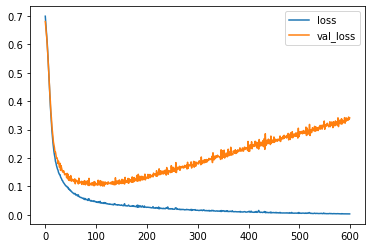

In [24]:
losses = pd.DataFrame(model.history.history)
losses.plot()

This is an example of an overfitting model where loss in training decreased while loss on validation data increased. Let's tune our model!

# Remodel With Early Stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

We will use early stop to prevent overfitting. Here, basically, we want the model to stop the epochs after the val_loss reach minimum value. Patience here means we will wait 25 epochs after we detect a stopping point because of noise that can occur.

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(X_train, y_train, epochs=600, validation_split=0.33, callbacks=[early_stop])

Train on 285 samples, validate on 141 samples
Epoch 1/600
285/285 [==============================] - 2s 5ms/sample - loss: 0.6872 - val_loss: 0.6707
Epoch 2/600
285/285 [==============================] - 0s 414us/sample - loss: 0.6651 - val_loss: 0.6556
Epoch 3/600
285/285 [==============================] - 0s 368us/sample - loss: 0.6447 - val_loss: 0.6327
Epoch 4/600
285/285 [==============================] - 0s 253us/sample - loss: 0.6131 - val_loss: 0.6062
Epoch 5/600
285/285 [==============================] - 0s 309us/sample - loss: 0.5824 - val_loss: 0.5801
Epoch 6/600
285/285 [==============================] - 0s 232us/sample - loss: 0.5500 - val_loss: 0.5497
Epoch 7/600
285/285 [==============================] - 0s 348us/sample - loss: 0.5163 - val_loss: 0.5154
Epoch 8/600
285/285 [==============================] - 0s 306us/sample - loss: 0.4818 - val_loss: 0.4841
Epoch 9/600
285/285 [==============================] - 0s 541us/sample - loss: 0.4494 - val_loss: 0.4426
Epoch 10/60

Here we could see that the epoch stop at 126 that means after that value, the validation data begin to increase the error or losses.

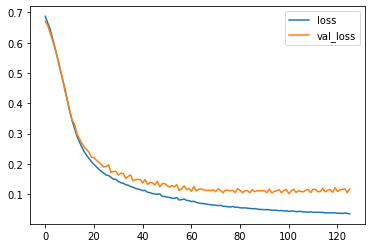

In [30]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Here while the error in validation data is not increased, the error is not decreased either. Let's use another technique named dropout to overcome this:

# Remodel With Dropout

In [32]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

Dropout is one of the technique to prevent overfitting. Dropout value of 0.5 means that half of the neurons or units in the previous layers will be turn off, so the weight and biases won't be updated. 

In [35]:
model.fit(X_train, y_train, epochs=600, validation_split=0.33, callbacks=[early_stop])


Train on 285 samples, validate on 141 samples
Epoch 1/600
285/285 [==============================] - 2s 6ms/sample - loss: 0.6713 - val_loss: 0.6836
Epoch 2/600
285/285 [==============================] - 0s 472us/sample - loss: 0.6718 - val_loss: 0.6707
Epoch 3/600
285/285 [==============================] - 0s 418us/sample - loss: 0.6604 - val_loss: 0.6552
Epoch 4/600
285/285 [==============================] - 0s 360us/sample - loss: 0.6524 - val_loss: 0.6375
Epoch 5/600
285/285 [==============================] - 0s 181us/sample - loss: 0.6351 - val_loss: 0.6214
Epoch 6/600
285/285 [==============================] - 0s 298us/sample - loss: 0.6207 - val_loss: 0.6029
Epoch 7/600
285/285 [==============================] - 0s 678us/sample - loss: 0.5740 - val_loss: 0.5827
Epoch 8/600
285/285 [==============================] - 0s 285us/sample - loss: 0.5903 - val_loss: 0.5617
Epoch 9/600
285/285 [==============================] - 0s 585us/sample - loss: 0.6000 - val_loss: 0.5425
Epoch 10/60

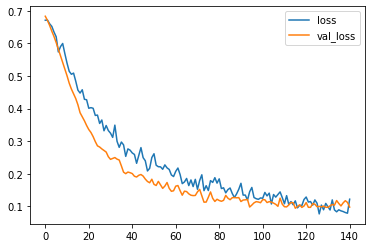

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

This is a much improved model, we can see that the error in both training and validation dataset are decreasing together along the epochs. 

# Prediction
On this section, we would like to predict the unseen data based on our improved model:


In [38]:
predictions = model.predict_classes(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.95      0.99      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [41]:
print(confusion_matrix(y_test, predictions))

[[50  5]
 [ 1 87]]


The result is nearly perfect with accuracy above 96%, with recall value of malignant of 99%